y-werte: [ 122124.5856  217760.7456  358056.8064  752186.9088 1163223.4176]
x-werte: [1.299e+13 1.999e+13 2.660e+13 4.363e+13 5.835e+13]
log y-werte: [5.0868031  5.33797959 5.55395193 5.87632577 6.06566314]
log x-werte: [13.11360915 13.30081279 13.42488164 13.63978521 13.76604086]


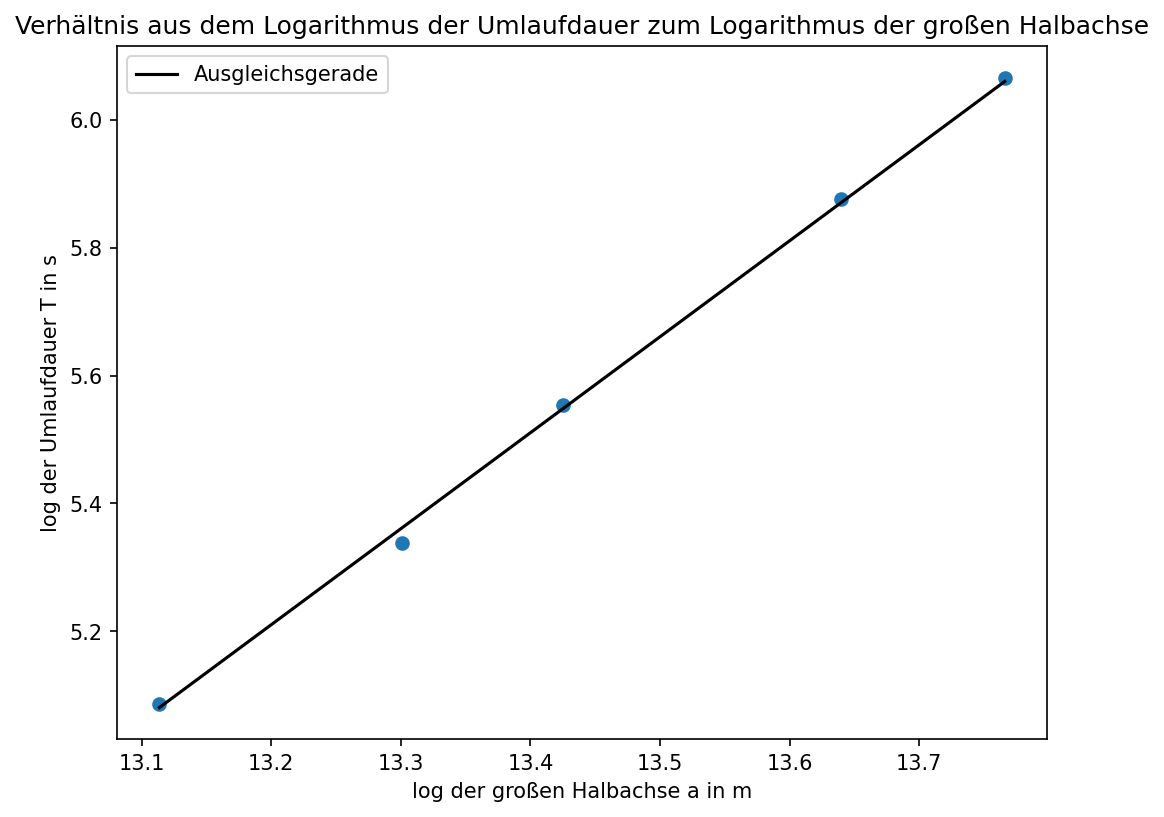

die Geradensteigung beträgt:1.5
der y-Achsenabschnitt beträgt:-14.589394188765732


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

x = [1.2990e5, 1.9990e5, 2.6600e5, 4.3630e5, 5.8350e5]  # große Halbachse in Meter
y = [1.413479, 2.520379, 4.144176, 8.705867, 13.463234]  # Umlaufdauer in Tagen




#ywerte,xwerte = np.loadtxt('Astro3.1.txt', delimiter=',').T             #Werte laden
xwerte = np.array(x)
ywerte = np.array(y)

xwerte=xwerte*10**8                                                    #Werte in Grundeinheiten umrechnen
ywerte=ywerte*24*3600
 
print("y-werte:",ywerte)                                               #Ausgabe der Werte vor dem Logarithmieren
print("x-werte:",xwerte)

ywerte=np.log10(ywerte)                                                #Werte logarithmieren
xwerte=np.log10(xwerte)
            
print("log y-werte:",ywerte)                                           #Ausgabe der logarithmierten Werte
print("log x-werte:",xwerte)



#Erstellen der Ausgleichsgerade                                                                          

def model_f(x,a):                                                   #Funktion der Ausgleichsgerade
    return a+b*x
  
b = 3/2                                                             #Steigung muss 3/2 betragen
  
popt, _=curve_fit(model_f,xwerte,ywerte)                            #Finden der optimalen Ausgleichsgerade durch die Punkte
a = popt[0]
     
xkoords=np.linspace(xwerte[0],xwerte[-1],100)

plt.figure(figsize=(8,6), dpi=150)                                                  #Erstellen der Grafik


plt.plot(xkoords, a + (b*xkoords), color="black", label="Ausgleichsgerade") #Zeichnen der Ausgleichsgerade mit Steigung 3/2 und y-Achsenabschnitt a                                                                           
plt.scatter(xwerte,ywerte, marker='o')                                                  #Werte einzeichnen, Achsen und Grafik beschriften
plt.title("Verhältnis aus dem Logarithmus der Umlaufdauer zum Logarithmus der großen Halbachse")
plt.xlabel("log der großen Halbachse a in m")
plt.ylabel("log der Umlaufdauer T in s")
plt.legend(loc="best")                                                   #Legende einfügen

plt.show()                                                               #Plot zeigen

print(f"die Geradensteigung beträgt:{b}")                                  #Werte der Ausgleichsgerade anzeigen
print(f"der y-Achsenabschnitt beträgt:{a}")